In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
def open_file(filename):
    txt_file = open(filename+".txt")
    read_txt = pandas.read_csv(txt_file, delimiter="\t\t")
    return np.array(read_txt)

In [3]:
background = open_file('background')
na22 = open_file('na-22')
ce137 = open_file('ce-137')
co60 = open_file('co-60')
ba133 = open_file('ba-133')
desconhecido = open_file('desconhecido')
desconhecido2 = open_file('desconhecido2')

samples = [(background, 'background'),
           (na22,'na-22'),
           (co60,'co-60'),
           (ba133,'ba-133'),
           (ce137,'ce-137'),
           (desconhecido, 'desconhecido'),
           (desconhecido2, 'desconhecido2')]

/tmp/ipykernel_596/3377353466.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  read_txt = pandas.read_csv(txt_file, delimiter="\t\t")


In [4]:
na22

array([[   1,    0],
       [   2,    1],
       [   3,  145],
       ...,
       [1021,    1],
       [1022,    2],
       [1023,    2]])

name:  na-22
channel:  219  energy:  0.511
channel:  540  energy:  1.275
[[2.190e+02 5.110e-01]
 [5.400e+02 1.275e+00]]


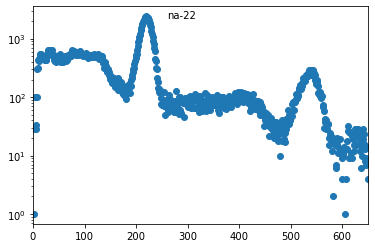

name:  co-60
channel:  497  energy:  1.173
channel:  557  energy:  1.333
[[2.190e+02 5.110e-01]
 [5.400e+02 1.275e+00]
 [4.970e+02 1.173e+00]
 [5.570e+02 1.333e+00]]


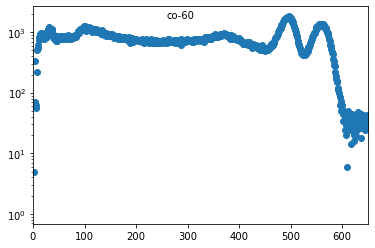

name:  ba-133
channel:  10  energy:  0.03
channel:  32  energy:  0.081
channel:  153  energy:  0.356
[[2.190e+02 5.110e-01]
 [5.400e+02 1.275e+00]
 [4.970e+02 1.173e+00]
 [5.570e+02 1.333e+00]
 [1.000e+01 3.000e-02]
 [3.200e+01 8.100e-02]
 [1.530e+02 3.560e-01]]


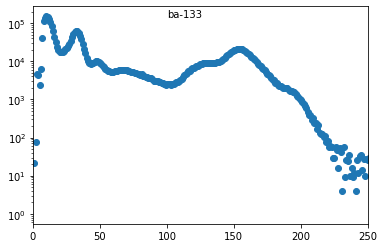

name:  ce-137
[   11 21568]
[  285 15849]


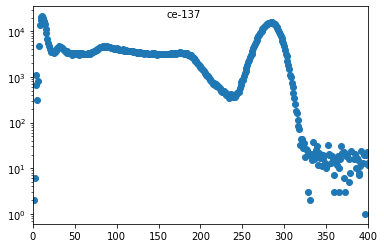

name:  desconhecido
[  11 7978]
[ 284 5658]


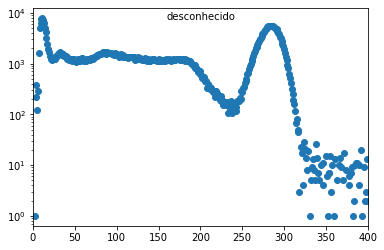

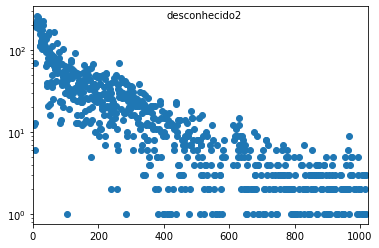

In [5]:

for sample, name in samples:
    if (name=="background"):
        continue
    data = sample[:,1]-background[:,1]
    channels = background[:,0]
    plt.plot(channels,data, 'o', label='data')
    plt.xlim(xmin=0)
    if (name=="na-22"):
        print('name: ', name)
        pico1 = data[(channels>180) & (channels<250)]
        pico1 = sample[data==pico1.max()][0]
        energy1 = 0.511
        print('channel: ', pico1[0], " energy: ", energy1)
        pico2 = data[(channels>500) & (channels<600)]
        pico2 = sample[data==pico2.max()][0]
        energy2 = 1.275
        print('channel: ', pico2[0], " energy: ", energy2)
        pico1 = np.array([pico1[0],energy1])
        pico2 = np.array([pico2[0],energy2])
        picos_channel = np.concatenate((pico1.reshape(1,-1),pico2.reshape(1,-1)),axis=0)
        print(picos_channel)
        plt.xlim(xmax=650)
    if (name=="co-60"):
        print('name: ', name)
        pico1 = data[(channels>450) & (channels<510)]
        pico1 = sample[data==pico1.max()][0]
        energy1 = 1.173
        print('channel: ', pico1[0], " energy: ", energy1)
        pico2 = data[(channels>515) & (channels<600)]
        pico2 = sample[data==pico2.max()][0]
        energy2 = 1.333
        print('channel: ', pico2[0], " energy: ", energy2)
        pico1 = np.array([pico1[0],energy1])
        pico2 = np.array([pico2[0],energy2])
        picos_channel = np.concatenate((picos_channel,pico1.reshape(1,-1),pico2.reshape(1,-1)),axis=0)
        print(picos_channel)
        plt.xlim(xmax=650)
    if (name=="ba-133"):
        print('name: ', name)
        pico1 = data[(channels>0) & (channels<25)]
        pico1 = sample[data==pico1.max()][0]
        energy1 = 0.030
        print('channel: ', pico1[0], " energy: ", energy1)
        pico2 = data[(channels>25) & (channels<50)]
        pico2 = sample[data==pico2.max()][0]
        energy2 = 0.081
        print('channel: ', pico2[0], " energy: ", energy2)
        pico3 = data[(channels>125) & (channels<175)]
        pico3 = sample[data==pico3.max()][0]
        energy3 = 0.356
        print('channel: ', pico3[0], " energy: ", energy3)
        pico1 = np.array([pico1[0],energy1])
        pico2 = np.array([pico2[0],energy2])
        pico3 = np.array([pico3[0],energy3])
        picos_channel = np.concatenate((picos_channel,pico1.reshape(1,-1),pico2.reshape(1,-1),pico3.reshape(1,-1)),axis=0)
        #picos_channel = np.concatenate((picos_channel,pico1.reshape(1,-1),pico3.reshape(1,-1)),axis=0)
        print(picos_channel)
        plt.xlim(xmax=250)
    if (name=="ce-137" or name=="desconhecido"):
        plt.xlim(xmax=400)
        print('name: ', name)
        pico1 = data[(channels>0) & (channels<25)]
        pico1 = sample[data==pico1.max()][0]
        print(pico1)
        pico2 = data[(channels>250) & (channels<300)]
        pico2 = sample[data==pico2.max()][0]
        print(pico2)
    if (name=="desconhecido2"):
        plt.xlim(xmax=1024)
    #plt.plot(xdata, fit_y, '-', label='fit')
    #plt.legend()
    botom, top = plt.ylim()
    left, right = plt.xlim()
    plt.yscale('log')
    plt.text(0.4*right,0.9*top,name)    
    plt.show()

Vamos utilizar três elementos (Na-22, Co-60 e Ba-33) para fazer a conversão do número de canal em valor de energia. Com isso, vamos descobrir o pico de emissão de gamma no césio, comparando com o valor referência. Por fim, tentaremos identificar qual o elemento desconhecido. 

epsilon_y = 0.0105


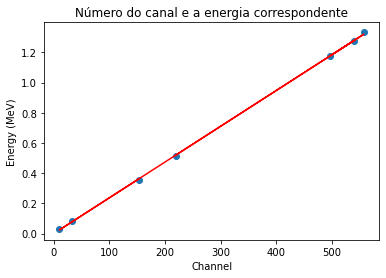

In [6]:
import math

x = picos_channel[:,0]
y = picos_channel[:,1]

y_mean = y.mean()
x_mean = x.mean()
y2_mean = (y*y).mean()
x2_mean = (x*x).mean()
y_std = np.sqrt(y2_mean-y_mean**2)
x_std = np.sqrt(x2_mean-x_mean**2)
yx = y*x
cov_yx = yx.mean() - y_mean*x_mean
r = cov_yx/(y_std*x_std)
a = cov_yx/(x_std**2)
ep_y = y_std*np.sqrt(4./2.*(1.-r**2))
a_std = (ep_y/2)/x_std
b = y_mean - a*x_mean
b_std = a_std*math.sqrt(x2_mean)
#print("a = ", a, " $\pm$ ", a_std)
#print("b = ", b, " $\pm$ ", b_std)
print("epsilon_y = {0:0.3}".format(ep_y))
m, n = np.polyfit(x, y,1)

plt.plot(x, y, 'o', x, m*x+n, 'r')
plt.title("Número do canal e a energia correspondente")
plt.ylabel("Energy (MeV)")
plt.xlabel("Channel")
plt.show()


In [7]:
print('Pico do Cesio: {0:0.3} +/- {1:0.2} MeV'.format(m*285+n,ep_y))

Pico do Cesio: 0.675 +/- 0.011 MeV


O valor de referência para este pico de energia do Césio é 0.662 MeV. Vamos verificar se não compatíveis

In [8]:
print('Discrepância: {0:0.3} < 2. Portanto o valor encontrado é compatível com o valor de referência.'.format((m*285+n-0.662)/ep_y) )

Discrepância: 1.28 < 2. Portanto o valor encontrado é compatível com o valor de referência.


A amostra primeira desconhecida possui um pico no canal 11 e outro no 284. Vamos descobrir a que energia esses canais correspondem:

In [9]:
print('Pico do canal 11: {0:0.3} +/- {1:0.2} MeV'.format(m*11+n,ep_y))

Pico do canal 11: 0.0264 +/- 0.011 MeV


In [10]:
print('Pico do canal 284: {0:0.3} +/- {1:0.2} MeV'.format(m*284+n,ep_y))

Pico do canal 284: 0.673 +/- 0.011 MeV


A segunda amostra desconhecida possivelmente se trata de uma substância de meia-vida muito curta, portanto não foi possível obter nenhum pico de energia que a caracterize.